<a href="https://colab.research.google.com/github/Snee21/Google-colab-projects/blob/main/virtual_reality_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras numpy matplotlib


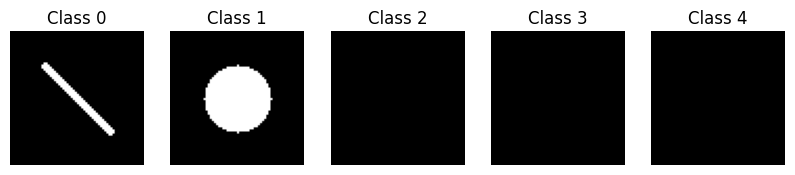

In [2]:
#Generate or Collect Synthetic Gesture Data
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define constants
IMG_SIZE = 64
NUM_CLASSES = 5
NUM_SAMPLES_PER_CLASS = 100

# Function to generate synthetic hand gesture images
def generate_synthetic_gesture_data(num_classes, img_size, num_samples_per_class):
    data = []
    labels = []
    for i in range(num_classes):
        for j in range(num_samples_per_class):
            img = np.zeros((img_size, img_size, 3), dtype=np.uint8)
            if i == 0:
                cv2.line(img, (img_size//4, img_size//4), (3*img_size//4, 3*img_size//4), (255, 255, 255), 2)  # Example gesture
            elif i == 1:
                cv2.circle(img, (img_size//2, img_size//2), img_size//4, (255, 255, 255), -1)
            # Add more synthetic gestures for other classes
            data.append(img)
            labels.append(i)
    return np.array(data), np.array(labels)

x_data, y_data = generate_synthetic_gesture_data(NUM_CLASSES, IMG_SIZE, NUM_SAMPLES_PER_CLASS)

# Normalize data
x_data = x_data / 255.0

# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data, NUM_CLASSES)

# Visualize some of the data
def plot_sample_images(data, labels, num_classes):
    plt.figure(figsize=(10, 10))
    for i in range(num_classes):
        plt.subplot(1, num_classes, i+1)
        plt.imshow(data[i * NUM_SAMPLES_PER_CLASS])
        plt.title(f"Class {labels[i * NUM_SAMPLES_PER_CLASS]}")
        plt.axis('off')
    plt.show()

plot_sample_images(x_data, np.argmax(y_data, axis=1), NUM_CLASSES)


In [3]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)


Training data shape: (400, 64, 64, 3)
Testing data shape: (100, 64, 64, 3)


In [4]:
#Build the Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [5]:
#train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
13/13 [==============================] - 7s 404ms/step - loss: 1.0454 - accuracy: 0.5225 - val_loss: 0.9049 - val_accuracy: 0.5200
Epoch 2/10
13/13 [==============================] - 3s 217ms/step - loss: 0.8508 - accuracy: 0.6100 - val_loss: 0.6845 - val_accuracy: 0.6600
Epoch 3/10
13/13 [==============================] - 3s 245ms/step - loss: 0.7499 - accuracy: 0.5950 - val_loss: 0.7205 - val_accuracy: 0.5200
Epoch 4/10
13/13 [==============================] - 3s 218ms/step - loss: 0.7704 - accuracy: 0.5925 - val_loss: 0.7111 - val_accuracy: 0.5200
Epoch 5/10
13/13 [==============================] - 3s 242ms/step - loss: 0.7319 - accuracy: 0.5975 - val_loss: 0.6690 - val_accuracy: 0.6600
Epoch 6/10
13/13 [==============================] - 3s 231ms/step - loss: 0.7156 - accuracy: 0.6050 - val_loss: 0.6814 - val_accuracy: 0.5200
Epoch 7/10
13/13 [==============================] - 2s 165ms/step - loss: 0.7151 - accuracy: 0.6025 - val_loss: 0.6578 - val_accuracy: 0.5200
Epoch 

In [6]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


4/4 [==============================] - 0s 59ms/step - loss: 0.6565 - accuracy: 0.5200
Test accuracy: 0.5199999809265137


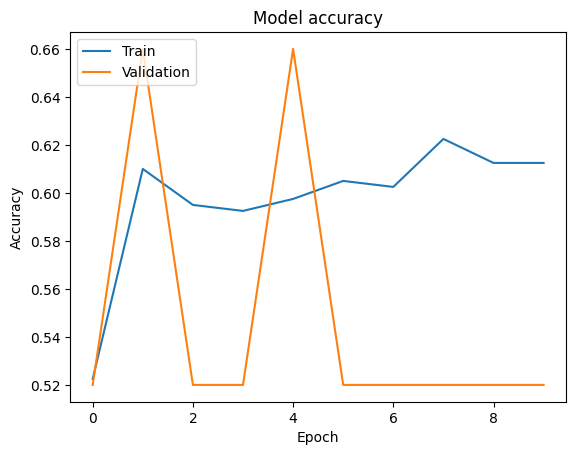

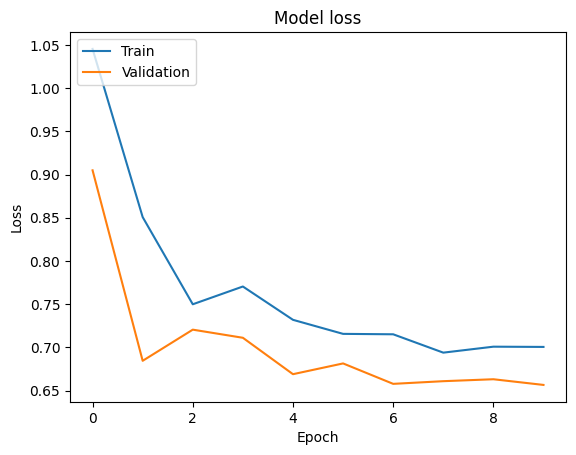

In [7]:
#visualize the training history
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


4/4 [==============================] - 0s 51ms/step


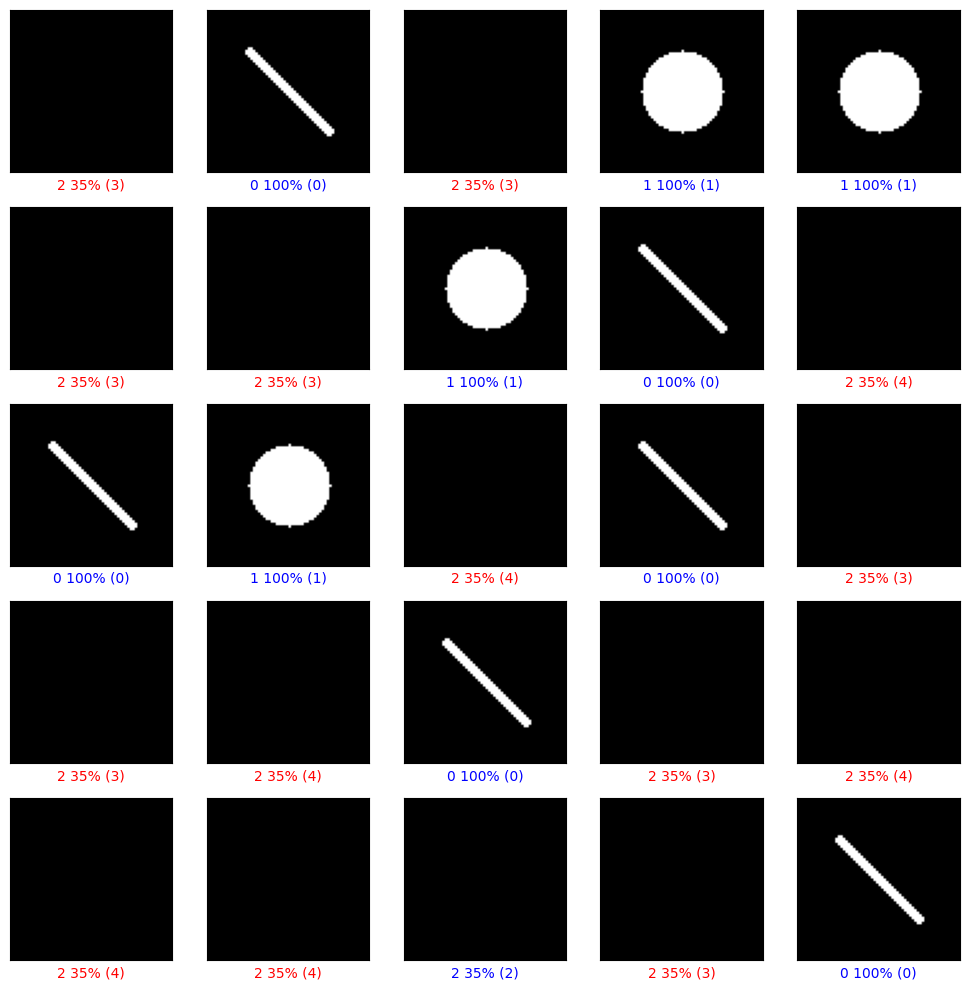

In [8]:
#make predictions
predictions = model.predict(x_test)

# Function to plot image with predicted and true label
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

# Plot some test images with predictions
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()
